In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df.columns
df.shape

(13490604, 7)

In [3]:
df.columns = ['LSOA_Code','Borough', 'Major_Category', 'Minor_Category', 'Value', 'Year', 'Month']
# df.set_index('LSOA_Code', inplace=True)
df

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
df

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [5]:
df_crimes_val = df.loc[df['Value']!=0]
df_crimes_val

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [6]:
import geopandas as gpd

In [7]:
import geopandas as gpd
london_map = gpd.read_file('London_Borough_Excluding_MHW.shp')
crimesPerBorough = df_crimes_val.groupby('Borough')['Value'].sum()
joined = london_map.set_index('NAME').join(crimesPerBorough)

joined['coords'] = joined['geometry'].\
    apply(lambda x: x.representative_point().coords[:])
joined['coords'] = [coords[0] for coords in joined['coords']]


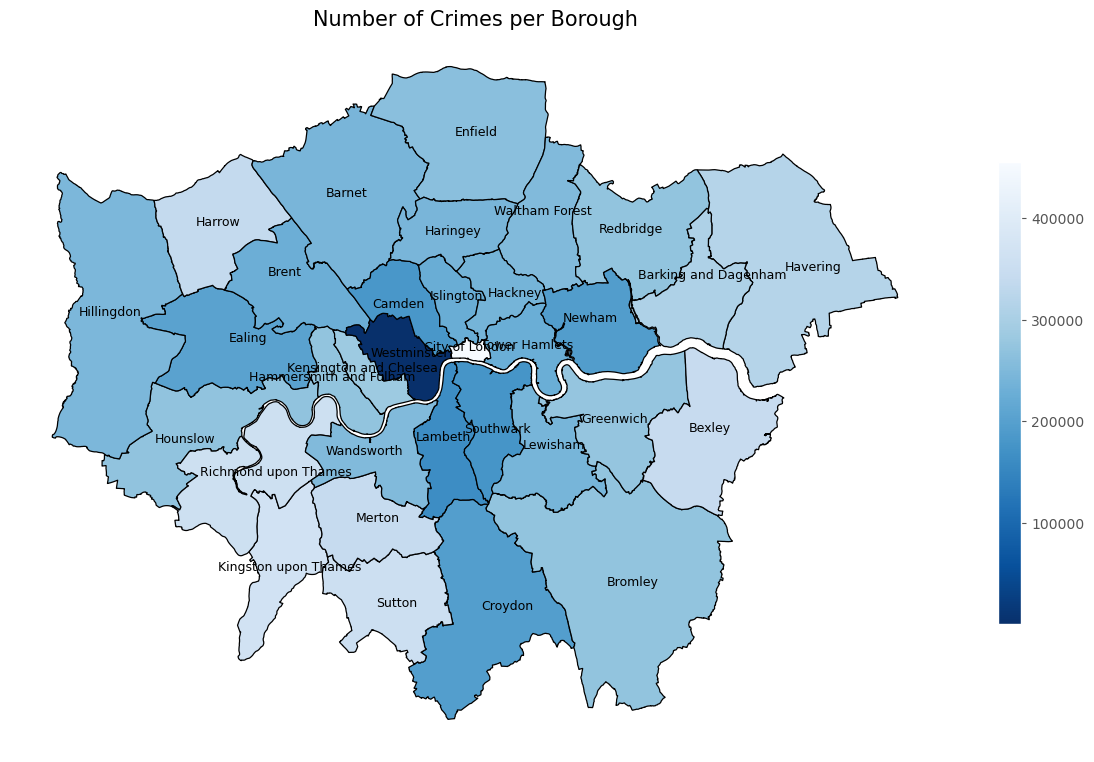

In [8]:
joined.plot(column='Value', cmap='Blues', linewidth=0.9, edgecolor='black', 
            figsize=(15, 12))
plt.axis('off')
plt.title('Number of Crimes per Borough', fontsize=15)
scalarMap = plt.cm.ScalarMappable(cmap='Blues_r', 
                           norm=plt.Normalize(vmin=min(joined['Value']), 
                                              vmax=max(joined['Value'])))
scalarMap._A = []
cbar = plt.colorbar(scalarMap, shrink=0.5)
for idx, row in joined.iterrows():
    plt.annotate(text=idx, xy=row['coords'],
                 horizontalalignment='center', fontsize=9)

In [9]:
from geopy.geocoders import Nominatim

In [10]:
borough = df['Borough']

In [11]:
borough = df['Borough'].unique()
borough

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [12]:
# lat_arr = []
# long_arr = []

# for borough in df['Borough']:
#     lat_long_coords = geolocator.geocode(borough)
#     lat_arr.append(lat_long_coords.raw['lat'])
#     long_arr.append(lat_long_coords.raw['lon'])

In [13]:
a = len(borough)

In [14]:
df['lat'], df['long'] = np.nan, np.nan
df

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month,lat,long
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,NaN,NaN
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,NaN,NaN
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,NaN,NaN
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,NaN,NaN
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,NaN,NaN
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,NaN,NaN
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,NaN,NaN
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,NaN,NaN


In [15]:
from geopy.exc import GeocoderTimedOut
Latitude = []
Longitude = []

In [16]:
def do_geocode(address):
    try:
        geolocator = Nominatim(user_agent="ld_explorer")
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

In [17]:
for i in range(len(borough)):
    address = '{},London,United Kingdom'.format(borough[i])
    location = do_geocode(address) # geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3713049, 51.4820845, 51.36685695, 51.5763203, 51.4570271, 51.5126553, 51.4686132, 51.5300157, 51.357464449999995, 51.587929849999995, 51.4952111, 51.4405529, 51.542519299999995, 51.54437325, 51.5540907, 51.4096275, 51.5004439, 51.5432402, 51.6520851, 51.596827149999996, 51.4624325, 51.5639957, 51.503925, 51.65309, 51.59816935, 51.54279655, 51.4416793, 51.50379515, 51.5384287, 51.5081201, 51.498314199999996, 51.41086985, 51.5156177] [-0.101957, -0.0045417, 0.061709076090816765, 0.0454097, -0.1932607, -0.3051952, -0.3613471, 0.029309078788513746, -0.17362689496950337, -0.10541771297992009, -0.1163354, -0.3076394377337949, -0.44833493117949663, -0.14431380000000021, 0.15048888801039415, -0.3062621, -0.1265398, -0.0493621, -0.0810175, -0.3373046180437286, -0.0101331, -0.27590641378489267, -0.1049663, -0.2002261, -0.01783667461048707, -0.16248031357798964, 0.150488, -0.20078938323179596, -0.0999051, -0.07622237194643053, -0.22787818358222445, -0.18809708858824303, -0.0919983]


In [18]:
lat_arr = []
long_arr = []

def do_geocode(address):
    try:
        geolocator = Nominatim(user_agent="crime_loc")
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

In [19]:
# for i in df['Borough']:
#     address = '{},London,United Kingdom'.format(i in df['Borough'])
#     location = do_geocode(address) # geolocator.geocode(address)
#     lat_arr.append(location.raw['lat'])
#     long_arr.append(location.raw['lon'])

# print(lat_arr, long_arr)

In [20]:
# df.insert(loc=1, column='long', value=long_arr)
# df.insert(loc=1, column='lat', value=lat_arr)

In [21]:
# for index, row in df.iterrows():
#     print("lat: " + str(row['lat']) + ", long: "+ str(row['long']))

In [22]:
df_loc = {'Borough' :borough, 'lat': Latitude, 'long':Longitude}

df_loc= pd.DataFrame(data=df_loc, columns=['Borough','lat', 'long'])
df_loc

# # df_crime
# df_lat

,Borough,lat,long
0,Croydon,51.371305,-0.101957
1,Greenwich,51.482084,-0.004542
2,Bromley,51.366857,0.061709
3,Redbridge,51.576320,0.045410
4,Wandsworth,51.457027,-0.193261
5,Ealing,51.512655,-0.305195
6,Hounslow,51.468613,-0.361347
7,Newham,51.530016,0.029309
8,Sutton,51.357464,-0.173627
9,Haringey,51.587930,-0.105418


In [23]:
df['lat'], df['long'] = np.nan, np.nan
df[(df['Borough']=='Croydon')]

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month,lat,long
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,NaN,NaN
42,E01001029,Croydon,Drugs,Possession Of Drugs,0,2010,12,NaN,NaN
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5,NaN,NaN
55,E01001171,Croydon,Violence Against the Person,Offensive Weapon,0,2012,12,NaN,NaN
83,E01000996,Croydon,Drugs,Drug Trafficking,0,2008,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13490513,E01001146,Croydon,Sexual Offences,Other Sexual,0,2008,4,NaN,NaN
13490516,E01001111,Croydon,Criminal Damage,Criminal Damage To Dwelling,0,2016,2,NaN,NaN
13490577,E01001135,Croydon,Criminal Damage,Other Criminal Damage,0,2015,4,NaN,NaN
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1,NaN,NaN


In [24]:
df_join = pd.merge(df, df_loc, how='outer', on='Borough', suffixes = ('_left', 'right'))
df_join

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month,lat_left,long_left,latright,longright
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,NaN,NaN,51.371305,-0.101957
1,E01001029,Croydon,Drugs,Possession Of Drugs,0,2010,12,NaN,NaN,51.371305,-0.101957
2,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5,NaN,NaN,51.371305,-0.101957
3,E01001171,Croydon,Violence Against the Person,Offensive Weapon,0,2012,12,NaN,NaN,51.371305,-0.101957
4,E01000996,Croydon,Drugs,Drug Trafficking,0,2008,2,NaN,NaN,51.371305,-0.101957
...,...,...,...,...,...,...,...,...,...,...,...
13490599,E01000001,City of London,Theft and Handling,Theft/Taking of Pedal Cycle,0,2009,12,NaN,NaN,51.515618,-0.091998
13490600,E01000002,City of London,Drugs,Possession Of Drugs,0,2016,9,NaN,NaN,51.515618,-0.091998
13490601,E01000005,City of London,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2008,10,NaN,NaN,51.515618,-0.091998
13490602,E01032739,City of London,Violence Against the Person,Common Assault,0,2013,10,NaN,NaN,51.515618,-0.091998


In [25]:
df_join.drop('long_left', axis=1, inplace=True)
df_join.drop('lat_left', axis=1, inplace=True)

In [26]:
df_loc = df_join.loc[df_join['Value']!=0]
df_loc

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month,latright,longright
2,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5,51.371305,-0.101957
6,E01001170,Croydon,Violence Against the Person,Common Assault,1,2014,11,51.371305,-0.101957
9,E01001012,Croydon,Theft and Handling,Theft From Motor Vehicle,9,2012,4,51.371305,-0.101957
12,E01001014,Croydon,Drugs,Possession Of Drugs,4,2011,6,51.371305,-0.101957
14,E01001005,Croydon,Theft and Handling,Theft From Shops,1,2009,1,51.371305,-0.101957
...,...,...,...,...,...,...,...,...,...
13490508,E01032739,City of London,Theft and Handling,Other Theft,1,2011,10,51.515618,-0.091998
13490522,E01032739,City of London,Theft and Handling,Other Theft,4,2011,11,51.515618,-0.091998
13490547,E01032739,City of London,Theft and Handling,Other Theft,7,2012,3,51.515618,-0.091998
13490587,E01032739,City of London,Theft and Handling,Theft From Shops,1,2016,3,51.515618,-0.091998


In [27]:
df_loc.columns =  ['LSOA_Code', 'Borough', 'Major_Category', 'Minor_Category', 'Value', 'Year', 'Month', 'lat', 'long']

In [28]:
# limit = 602105     
# df_loc = df_loc.iloc[0:limit, :]
# df_loc

In [29]:
# import folium 
# from folium import plugins

# latitude = 51.512655
# longitude = -0.305195

# crime_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
# crimes = plugins.MarkerCluster().add_to(crime_map)
# # labels = list(df_loc.Major_Category)

# for lat,long, label, in zip(df_loc.lat, df_loc.long, df_loc.Major_Category):
#     folium.Marker(
#             location = [lat, long],
#             icon = None,
#             popup=label,
            
#             # radius=5,
#             # color='yellow',
#             # fill=True, 
#             # fill_color='blue',
#             # fill_opacity=0.6
#         ).add_to(crimes)

# crime_map

In [30]:
df_fm = df_loc[['Borough', 'lat', 'long']]
df_fm.groupby('Borough').value_counts()

Borough                 lat        long     
Barking and Dagenham    51.554091   0.150489     86849
Barnet                  51.653090  -0.200226    127194
Bexley                  51.441679   0.150488     73948
Brent                   51.563996  -0.275906    129925
Bromley                 51.366857   0.061709    109855
Camden                  51.542797  -0.162480    112029
City of London          51.515618  -0.091998       565
Croydon                 51.371305  -0.101957    147203
Ealing                  51.512655  -0.305195    140006
Enfield                 51.652085  -0.081018    117953
Greenwich               51.482084  -0.004542    104654
Hackney                 51.543240  -0.049362    116521
Hammersmith and Fulham  51.498314  -0.227878     92084
Haringey                51.587930  -0.105418    116315
Harrow                  51.596827  -0.337305     73993
Havering                51.544373  -0.144314     82288
Hillingdon              51.542519  -0.448335    110614
Hounslow            

In [31]:
# for i in range (0,len(df_loc)):
#     folium.Circle(
#         location=[df_loc.iloc[i]['lat'], df_loc[i]['long']],
#         geo_data='London',
#         popup=str(df_loc[i]['Borough'], df_loc[i]['Value']),
#         fill=True,
#         fill_color='blue'
        
#     ).add_to()

In [32]:
d = {'Borough':['Croydon', 'Ealing'],
     'lat':[51.371305, 51.512655],
     'long':[-0.101957, -0.305195]
    }

d = pd.DataFrame(d)

latitude = [float(lat) for lat in d['lat']]
latitude

[51.371305, 51.512655]

In [ ]:
import folium 

# latitude = [float(lat) for lat in d['lat']]
# longitude = [float(long) for long in d['long']]

latitude = 51.507
longitude = -0.1278 

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=15)

incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
# for lat, lng, in zip(d.lat, d.long):
#     incidents.add_child(
#         folium.CircleMarker(
#             [lat, lng],
#             radius=5, 
#             color='yellow',
#             fill=True,
#             fill_color='blue',
#             fill_opacity=0.6
#         )
#     )
    
# for index, location_info in d.iterrows():
#     folium.Marker([location_info['lat'],
#                    location_info['long']],
#                   popup=location_info['Borough']).add_to(sanfran_map )


colors = {'Barking and Dagenham': 'rosybrown',
          'Barnet':'brown',
          'Bexley':'mistyrose',
          'Brent':'tomato',
          'Bromley':'salmon',
          'Camden': 'beige',
          'City of London':'blueviolet',
          'Croydon' : 'red',
          'Ealing' : 'blue',
          'Enfield':'cadet blue',
          'Greenwich':'cornflower',
          'Hackney':'Crimson',
          'Hammersmith and Fulham':'darkkhaki',
          'Haringey':'darkseagreen',
          'Harrow':'lightcyan',
          'Havering': 'lightslategrey',
          'Hillingdon': 'lightslategrey',
          'Hounslow':'lightslategrey',
          'Islington':'steelblue',
          'Kensington and Chelsea':'tan',
          'Kingston upon Thames': 'teal',
          'Lambeth': 'lightcoral',
          'Lewisham':'indianred',
          'Merton': 'indigo',
          'Newham': 'lavender',
          'Redbridge' : 'khaki',
          'Richmond upon Thames':'goldenrod',
          'Southwark': 'chocolate',
          'Sutton': 'aliceblue',
          'Tower Hamlets': 'darkcyan',
          'Waltham Forest': 'greenyellow',
          'Wandsworth': 'hotpink',
          'Westminster': 'lightskyblue'
         }

df_fm.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["long"]], 
                                              radius=10, fill_color=colors[row['Borough']])
                                             .add_to(sanfran_map), axis=1)


sanfran_map

# add incidents to map
sanfran_map.add_child(incidents)

In [ ]:
# HeatMapWithTime(lat_long_list,radius=5,auto_play=True,position='bottomright').add_to(df_map)
# df_map

In [ ]:
# import folium
# df_map = folium.Map(location=[df_fm.lat.mean(),
#                               df_fm.long.mean()],
#                               zoom_start=14,
#                               control_scale=True
#                              )
# df_map

In [ ]:
# import folium
# for index, location_info in df_loc.iterrows():
#     folium.Marker([location_info['lat'],
#                    location_info['long']],
#                   popup=location_info['Borough']).add_to(df_map)
    
# df_map.add_child()
# df_map

In [ ]:
# latitude = 51.512655
# longitude = -0.305195

In [ ]:
# import folium
# crime_map = folium.Map(location=[latitude, longitude], zoom_start=12)
# crime_map

In [ ]:
# import folium

# latitude = list(df_loc.lat)
# longitude = list(df_loc.long)
# labels = list(df_loc.Major_Category)
# crime_map = folium.Map(location=[latitude, longitude], zoom_start=12)
# crime_map

In [ ]:
# import folium

# latitude = (df_lat.iterrows())
# longitude = df_lon.iterrows()
# labels = list(df_loc.Major_Category)
# crime_map = folium.Map(location=[latitude, longitude], zoom_start=12)
# crime_map